# Performing a Regression Analysis

## Table of Contents
* [01. Importing Libraries and Data](#01.-Importing-Libraries-and-Data)
* [02. Viewing Data and its Statistics](#02.-Viewing-Data-and-its-Statistics)
* [03. Prepping Data for Regression](#03.-Prepping-Data-for-Regression)
* [04. Regression Analysis for Test Set](#04.-Regression-Analysis-for-Test-Set)
* [05. Regression Analysis for Training Set](#05.-Regression-Analysis-for-Training-Set)

# 01. Importing Libraries and Data

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Import data 
df_regress = pd.read_pickle(r'/Users/suzandiab/Documents/Cost of Living/02 Data/Prepared Data/df_map.pkl')

In [3]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

# 02. Viewing Data and its Statistics 

In [4]:
# Checking columns
df_regress.columns

Index(['case_id', 'state', 'metropolitan_area', 'county',
       'family_member_count', 'annual_housing_cost', 'annual_food_cost',
       'annual_transportation_cost', 'annual_healthcare_cost',
       'annual_other_necessities_cost', 'annual_childcare_cost',
       'annual_taxes', 'annual_total_cost', 'median_family_income',
       'parent_status', 'number_of_dependents', 'income_level'],
      dtype='object')

In [5]:
# Viewing df
df_regress.head()

,case_id,state,metropolitan_area,county,family_member_count,annual_housing_cost,annual_food_cost,annual_transportation_cost,annual_healthcare_cost,annual_other_necessities_cost,annual_childcare_cost,annual_taxes,annual_total_cost,median_family_income,parent_status,number_of_dependents,income_level
0,1,Alabama,True,Autauga County,1p0c,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.41406,single parent,0.0,Average Income
1,1,Alabama,True,Autauga County,1p1c,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.41406,single parent,1.0,Average Income
2,1,Alabama,True,Autauga County,1p2c,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.41406,single parent,2.0,Average Income
3,1,Alabama,True,Autauga County,1p3c,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,18802.1892,13101.70320,94203.5328,73010.41406,single parent,3.0,Average Income
4,1,Alabama,True,Autauga County,1p4c,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,18802.1892,13469.21880,100823.5200,73010.41406,single parent,4.0,Average Income


In [6]:
# Dimensions
df_regress.shape

(31016, 17)

In [7]:
# Viewing df 
df_regress.head()

,case_id,state,metropolitan_area,county,family_member_count,annual_housing_cost,annual_food_cost,annual_transportation_cost,annual_healthcare_cost,annual_other_necessities_cost,annual_childcare_cost,annual_taxes,annual_total_cost,median_family_income,parent_status,number_of_dependents,income_level
0,1,Alabama,True,Autauga County,1p0c,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.41406,single parent,0.0,Average Income
1,1,Alabama,True,Autauga County,1p1c,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.41406,single parent,1.0,Average Income
2,1,Alabama,True,Autauga County,1p2c,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.41406,single parent,2.0,Average Income
3,1,Alabama,True,Autauga County,1p3c,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,18802.1892,13101.70320,94203.5328,73010.41406,single parent,3.0,Average Income
4,1,Alabama,True,Autauga County,1p4c,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,18802.1892,13469.21880,100823.5200,73010.41406,single parent,4.0,Average Income


In [8]:
# Check for missing values

df_regress.isnull().sum()

case_id                          0
state                            0
metropolitan_area                0
county                           0
family_member_count              0
annual_housing_cost              0
annual_food_cost                 0
annual_transportation_cost       0
annual_healthcare_cost           0
annual_other_necessities_cost    0
annual_childcare_cost            0
annual_taxes                     0
annual_total_cost                0
median_family_income             0
parent_status                    0
number_of_dependents             0
income_level                     0
dtype: int64

no missing values

In [9]:
# Checking for duplicates
dups = df_regress.duplicated()

In [10]:
# Dimensions
dups.shape

(31016,)

no duplicates

/var/folders/4p/ym48tzyj1vv3lyzdlk4g93jh0000gn/T/ipykernel_34403/3443717771.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_regress['median_family_income'], bins=25)
/Users/suzandiab/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='median_family_income', ylabel='Density'>

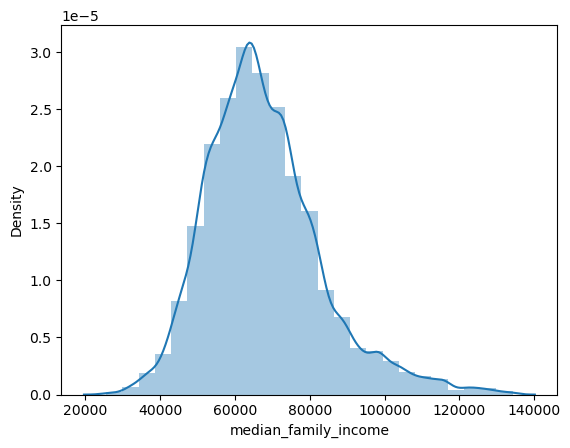

In [11]:
# Checking for extreme values 
sns.distplot(df_regress['median_family_income'], bins=25)

In [12]:
# Check mean
df_regress['median_family_income'].mean()

67647.73166793525

In [13]:
# Check median
df_regress['median_family_income'].median()

65706.60156

In [14]:
# Check max
df_regress['median_family_income'].max()

134261.6094

# 03. Prepping Data for Regression

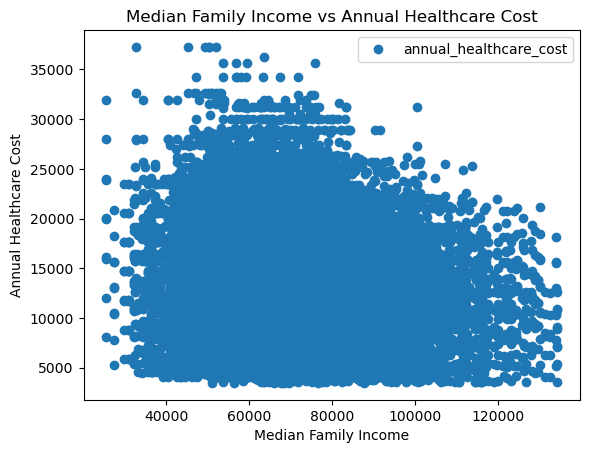

In [15]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_regress.plot(x = 'median_family_income', y='annual_healthcare_cost',style='o') 
plt.title('Median Family Income vs Annual Healthcare Cost')  
plt.xlabel('Median Family Income')  
plt.ylabel('Annual Healthcare Cost')  
plt.show()

If a household has a high median family income, then the household will have lower healthcare costs than a household that is average or low income.

In [16]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_regress['median_family_income'].values.reshape(-1,1)
y = df_regress['annual_healthcare_cost'].values.reshape(-1,1)

In [17]:
X

array([[73010.41406],
       [73010.41406],
       [73010.41406],
       ...,
       [80177.65625],
       [80177.65625],
       [80177.65625]])

In [18]:
y

array([[ 5737.47984],
       [ 8659.5564 ],
       [11581.6326 ],
       ...,
       [21705.9228 ],
       [25325.604  ],
       [28945.2864 ]])

In [19]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [20]:
# Create a regression object.

regression = LinearRegression()  

In [21]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

# 04. Regression Analysis for Test Set

In [22]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

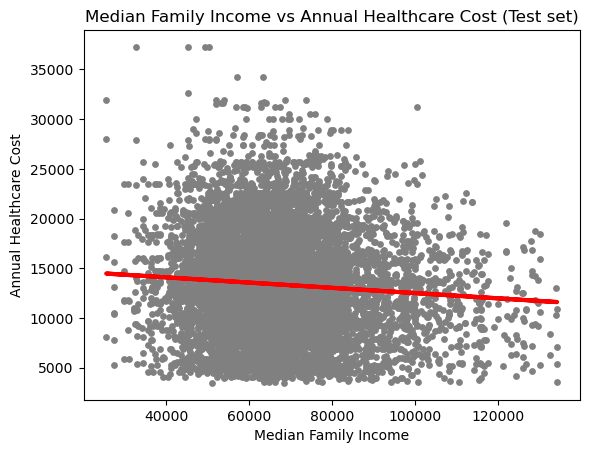

In [23]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Median Family Income vs Annual Healthcare Cost (Test set)')
plot_test.xlabel('Median Family Income')
plot_test.ylabel('Annual Healthcare Cost')
plot_test.show()

line does not fit the data well. a lot of points away from the line. 

In [24]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [25]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.0263805]]
Mean squared error:  26835857.8820517
R2 score:  0.007418697540591657


In [26]:
y_predicted

array([[13290.94281969],
       [12841.71239643],
       [13595.71187962],
       ...,
       [13349.10110256],
       [13124.45878905],
       [13295.16843981]])

In [27]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,10412.17380,13290.942820
1,16708.10400,12841.712396
2,8690.95968,13595.711880
3,14293.14000,13398.211905
4,19172.77200,13695.044247
5,13763.27400,13631.657886
6,13733.31120,13634.095815
7,5077.47984,13714.845697
8,18440.03280,13257.461639
9,25133.25000,13165.172349


# 05. Regression Analysis for Training Set

In [28]:
# Predict.

y_predicted_train = regression.predict(X_train) 

In [29]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [30]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.0263805]]
Mean squared error:  26955095.978765856
R2 score:  0.0062562903358294175


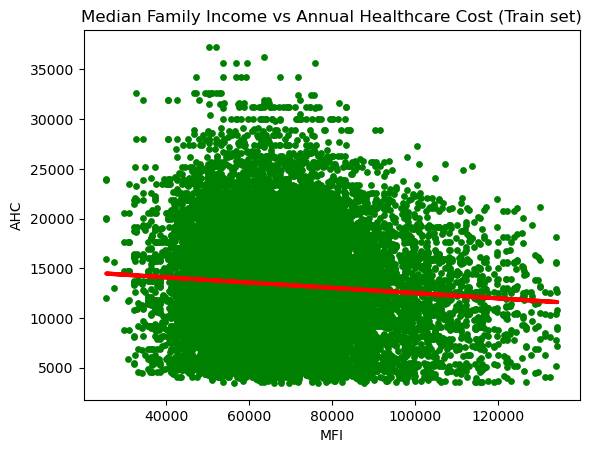

In [31]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Median Family Income vs Annual Healthcare Cost (Train set)')
plot_test.xlabel('MFI')
plot_test.ylabel('AHC')
plot_test.show()

In [32]:
# Clean the extreme values from the "Price per Unit" variable observed during the consistency checks.

df_test = df_regress[df_regress['median_family_income'] <=118000] 

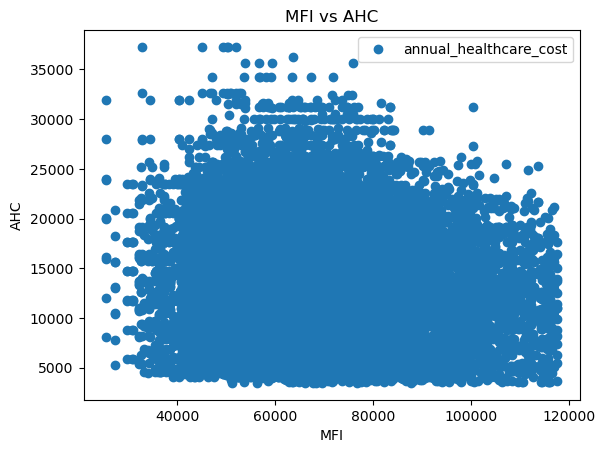

In [33]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'median_family_income', y='annual_healthcare_cost', style='o')  
plt.title('MFI vs AHC')  
plt.xlabel('MFI')  
plt.ylabel('AHC')  
plt.show()

In [34]:
# Reshape again.

X_2 = df_test['median_family_income'].values.reshape(-1,1)
y_2 = df_test['annual_healthcare_cost'].values.reshape(-1,1)

In [35]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [36]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [37]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [38]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [39]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.02510969]]
Mean squared error:  27141588.813274268
R2 score:  0.005593938508074658


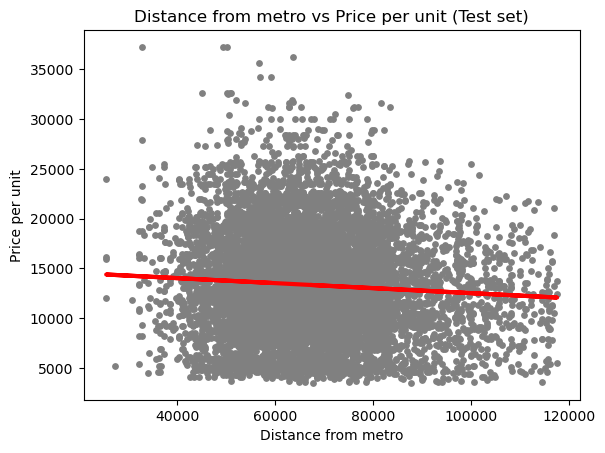

In [40]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Distance from metro vs Price per unit (Test set)')
plot_test.xlabel('Distance from metro')
plot_test.ylabel('Price per unit')
plot_test.show()

In [41]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,16453.04160,13339.932806
1,9194.69976,13050.824692
2,11670.81156,13233.035149
3,12085.37640,13631.825350
4,16136.22960,13280.270211
5,17027.70840,13335.987838
6,20093.07960,13735.706215
7,11397.19920,13203.874359
8,15848.39520,13647.759413
9,12328.33320,13237.315175


the model did not perform well at all on the test set. 
r squared value was very close to 0 which indicates a poor fit, even when outliers were removed.
so, median family income is not a good indication of projected healthcare costs. 

some extreme values were removed in a previous notebook so there might be some possible data bias.